 # <span style="color:blue"> M7U2: TIME SERIES ANALYSIS (March 13, 2021) </span>
<span style="color:red">Real World Sales Forecasting</span>

### K. Tuba Turkcan Karaca

# Table of Contents <a id="T"></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Data](#0)<br> 

2. [Sales A](#77) <br>
    2.1 [Naive Forecast](#78) <br>
    2.2 [Moving Average](#79) <br>
    2.3 [Smoothing](#80) <br> 
    2.4 [ARIMA Model](#81) <br> 
        
3. [Sales B](#82) <br>
    3.1. [Check for Stationarity](#83) <br>
    3.2. [Draw auto correlation and partial autocorrelation graphs](#84) <br>
    3.3. [Grid Search Over Parameters](#85) <br>
    3.4. [Create Auto Arima Model](#86) <br> 
    
4. [Sales C](#87) <br> 
    4.1. [Check for Stationarity](#88) <br>
    4.2. [Draw auto correlation and partial autocorrelation graphs](#89) <br>  
    
5. [Sales Total](#90) <br>
    5.1. [Seasonal and Trend Decomposition using Loess (STL)](#91) <br> 
    5.2. [Anomaly Detection](#92) <br>
    5.3. [Simple Exponential Smoothing (SES)](#93) <br>
    5.4. [Holt’s Model](#94) <br>
    5.5. [Holt-Winters’ Seasonal Model](#95) <br> 
 

###  Importing Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
import pmdarima as pm
import datetime as dt
import seaborn as sns
#!pip install statsmodels
#!pip install yfinance
#!pip install pmdarima
#!pip install tensorflow --user
#!pip install requests

import requests

from io import BytesIO
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from pmdarima import model_selection
from pandas import DataFrame
from tensorflow.keras.metrics import mse 
from tensorflow.keras.metrics import mae
from IPython.core.pylabtools import figsize
figsize(14, 7)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(42)
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas import DataFrame
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.stattools import kpss
from pmdarima import model_selection
from pandas import DataFrame
from IPython.core.pylabtools import figsize
figsize(14, 7)



In [15]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel('Value')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

### Data <a id="0"></a>                  [^](#T)<br>
**We have daily sales data of a restaurant. They grouped their sales as A, B, and C. Total column is sum of these A, B, and C.**


In [16]:
daily_sales = pd.read_csv('daily_sales.csv')
daily_sales.index = pd.to_datetime(daily_sales.Date)
daily_sales.drop(['Date'], axis=1, inplace=True)
daily_sales

Sales_A  Sales_B  Sales_C  Sales_Total
Date                                              
2020-07-31   2197.6   5025.0   1005.3       8227.9
2020-08-01   1797.4   3383.3   1294.0       6474.7
2020-08-02   1977.8   5167.6    941.4       8086.8
2020-08-03   3216.0   6486.2   1367.8      11070.0
2020-08-04   1722.0   4141.0    933.2       6796.2
...             ...      ...      ...          ...
2021-03-07   2423.9   7317.7   2768.3      12509.9
2021-03-08   2666.6   6938.8   1787.6      11393.0
2021-03-09   1856.5   4037.7   2415.7       8309.9
2021-03-10   2104.1   6251.7   2886.4      11242.2
2021-03-11   1454.7   5746.6   2171.4       9372.7

[224 rows x 4 columns]

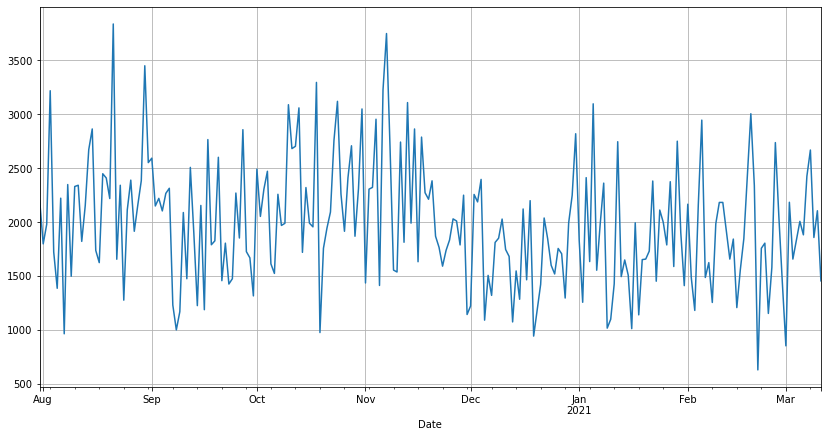

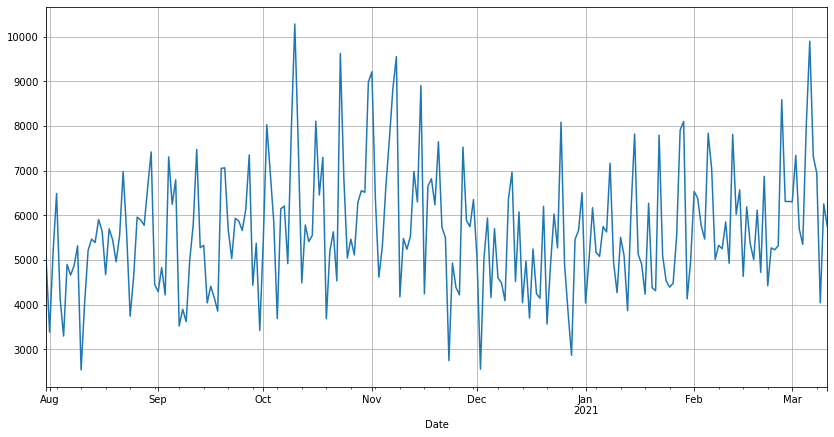

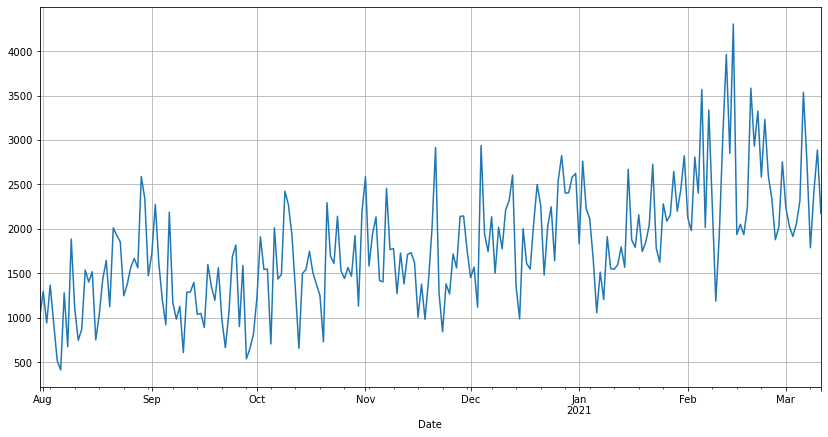

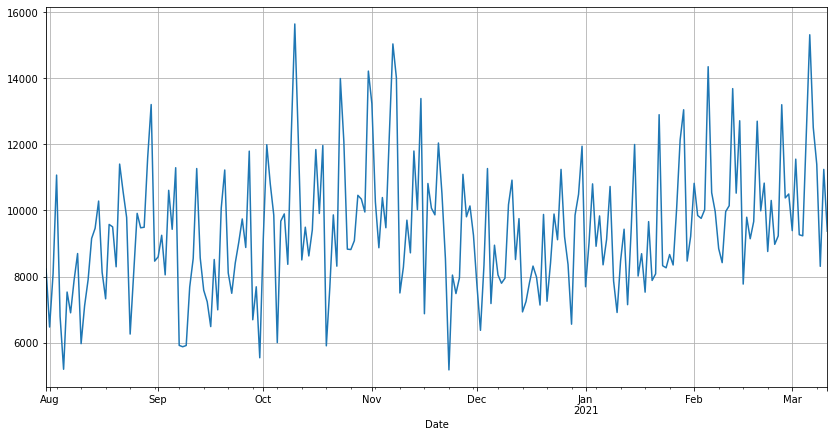

In [17]:

plt.figure(figsize=(14, 7))
daily_sales['Sales_A'].plot(grid=True)
plt.show()
plt.figure(figsize=(14, 7))
daily_sales['Sales_B'].plot(grid=True)
plt.show()
plt.figure(figsize=(14, 7))
daily_sales['Sales_C'].plot(grid=True)
plt.show()
plt.figure(figsize=(14, 7))
daily_sales['Sales_Total'].plot(grid=True)
plt.show()

In [18]:
daily_sales

Sales_A  Sales_B  Sales_C  Sales_Total
Date                                              
2020-07-31   2197.6   5025.0   1005.3       8227.9
2020-08-01   1797.4   3383.3   1294.0       6474.7
2020-08-02   1977.8   5167.6    941.4       8086.8
2020-08-03   3216.0   6486.2   1367.8      11070.0
2020-08-04   1722.0   4141.0    933.2       6796.2
...             ...      ...      ...          ...
2021-03-07   2423.9   7317.7   2768.3      12509.9
2021-03-08   2666.6   6938.8   1787.6      11393.0
2021-03-09   1856.5   4037.7   2415.7       8309.9
2021-03-10   2104.1   6251.7   2886.4      11242.2
2021-03-11   1454.7   5746.6   2171.4       9372.7

[224 rows x 4 columns]

##  Sales A <a id="77"></a>  [^](#T)<br>

<Figure size 1008x504 with 0 Axes>

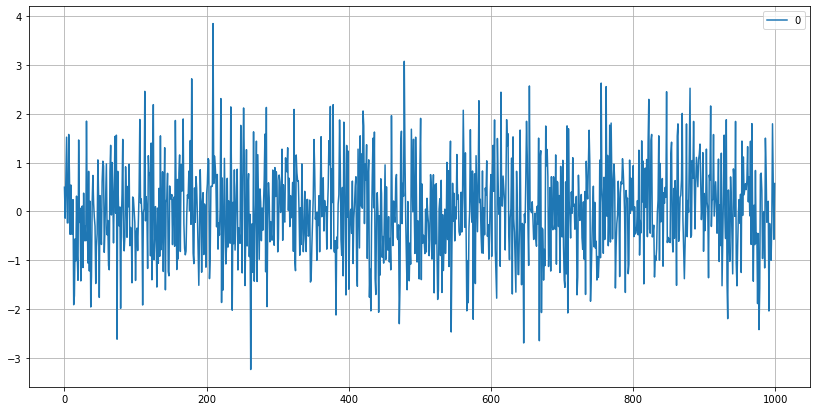

In [19]:
# Gaussian Noise 
noise = np.random.normal(size=1000)
noise = pd.DataFrame(noise)
plt.figure(figsize=(14, 7))
noise.plot(grid=True)
plt.show()

In [20]:
daily_sales.shape

(224, 4)

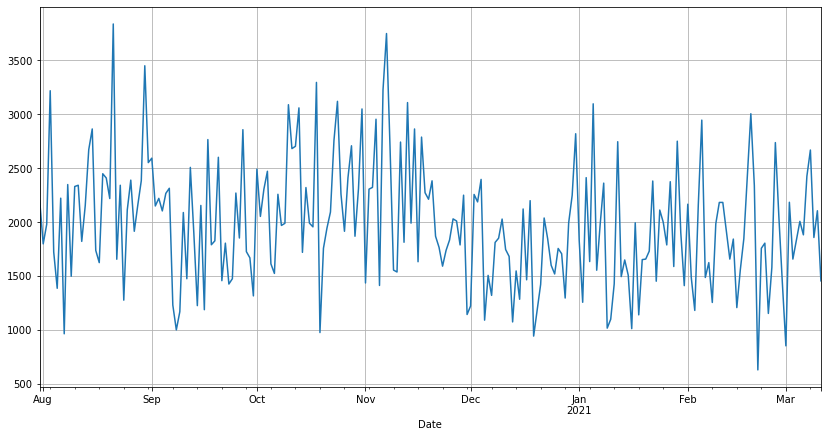

In [21]:
plt.figure(figsize=(14, 7))
daily_sales['Sales_A'].plot(grid=True)
plt.show()

In [22]:
time = np.arange(224) 

In [24]:
salesA = daily_sales['Sales_A'].values
print(salesA)

[2197.6 1797.4 1977.8 3216.  1722.  1385.8 2220.6  964.3 2346.8 1497.3
 2328.8 2340.3 1820.4 2151.7 2669.9 2861.8 1736.8 1623.6 2446.9 2407.5
 2217.3 3834.3 1654.8 2340.3 1275.9 2112.3 2387.8 1913.9 2156.6 2382.9
 3447.3 2550.2 2591.2 2148.4 2218.9 2102.5 2264.8 2312.4 1230.  1000.4
 1169.3 2087.7 1474.4 2505.9 1895.8 1225.1 2153.3 1187.4 2763.4 1789.2
 1825.3 2599.4 1456.3 1804.  1425.2 1474.4 2268.1 1851.6 2855.2 1725.3
 1667.9 1315.3 2489.5 2051.6 2304.2 2469.8 1612.1 1523.6 2256.6 1968.
 1987.7 3086.5 2679.8 2701.1 3057.  1718.7 2319.  1989.3 1954.9 3293.1
  975.8 1756.4 1943.4 2092.6 2755.2 3117.6 2259.9 1913.9 2410.8 2706.
 1868.  2309.1 3047.1 1435.  2304.2 2320.6 2952.  1412.  3222.6 3745.8
 2697.8 1554.7 1536.7 2740.4 1812.2 3106.2 1989.3 2861.8 1631.8 2786.4
 2271.4 2210.7 2381.3 1868.  1764.6 1590.8 1736.8 1833.5 2028.7 2009.
 1787.6 2248.4 1143.1 1221.8 2255.  2186.1 2394.4 1090.6 1505.5 1320.2
 1810.6 1849.9 2027.  1745.  1681.  1074.2 1546.5 1284.1 2120.5 1464.5
 2197.6  

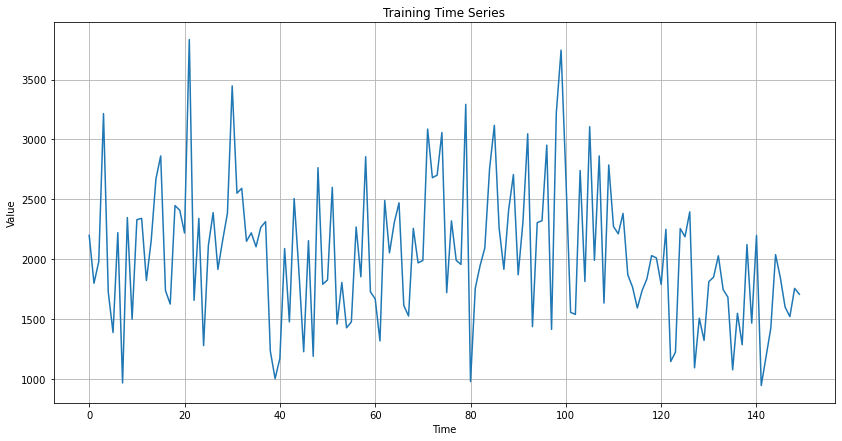

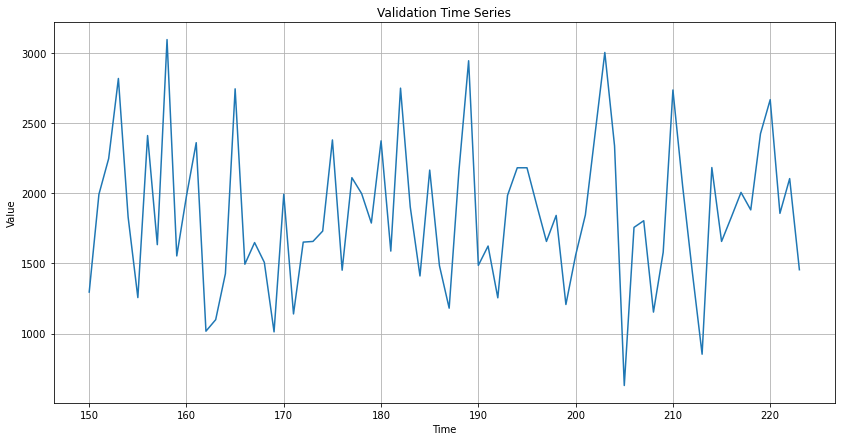

In [25]:
split_time = 150
time_train = time[:split_time]
x_train = salesA[:split_time]
time_valid = time[split_time:]
x_valid = salesA[split_time:]

plt.figure(figsize=(14, 7))
plot_series(time_train, x_train)
plt.title('Training Time Series')
plt.show()

plt.figure(figsize=(14, 7))
plot_series(time_valid, x_valid)
plt.title('Validation Time Series')
plt.show()

###  Naive Forecast <a id="78"></a>                  [^](#T)<br>


MSE(naive_forecast) = 540527.2790540541


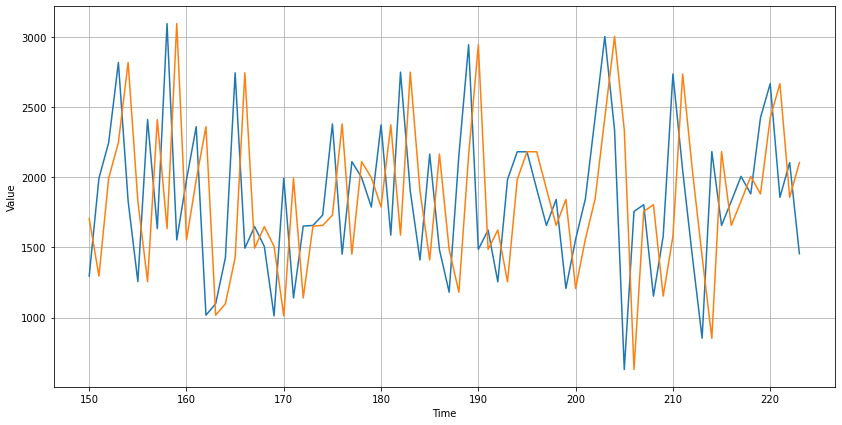

In [26]:
naive_forecast = salesA[split_time - 1:-1]
plt.figure(figsize=(14, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast);

print(f'\nMSE(naive_forecast) = {np.array(mse(x_valid, naive_forecast))}')

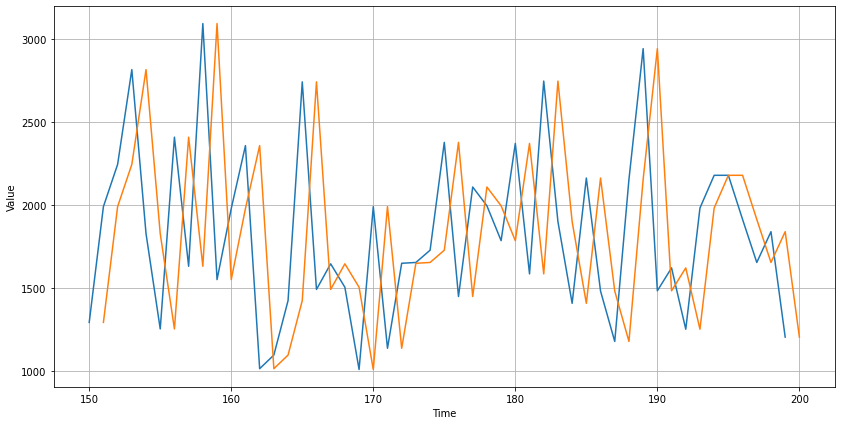

In [27]:
# Let's zoom in the first 50 terms

plt.figure(figsize=(14, 7))
plot_series(time_valid, x_valid, start=0, end=50)
plot_series(time_valid, naive_forecast, start=1, end=51)

###  Moving Average <a id="79"></a>                  [^](#T)<br>

In [32]:
def moving_average_forecast(series, window_size):
    """
       Forecasts the mean of the last `window_size` values.
       If `window_size = 1`, then this is equivalent to `naive forecast`
    """
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

In [33]:
split_time = 150
time_train = time[:split_time]
x_train = salesA[:split_time]
time_valid = time[split_time:]
x_valid = salesA[split_time:]



MSE(moving_avg) = 290018.99660990987


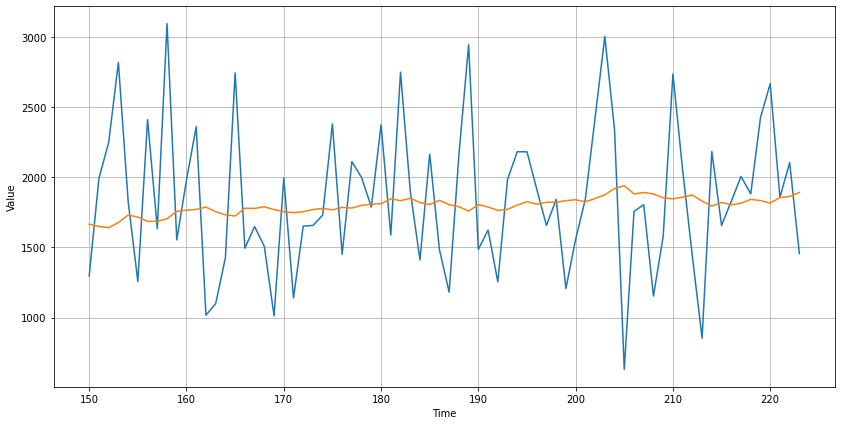

In [34]:
# 30 days (month) moving average
moving_avg = moving_average_forecast(salesA, 30)[split_time - 30:]

plt.figure(figsize=(14, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

print(f'\nMSE(moving_avg) = {np.array(mse(x_valid, moving_avg))}')


MSE(moving_avg) = 314384.11293712084


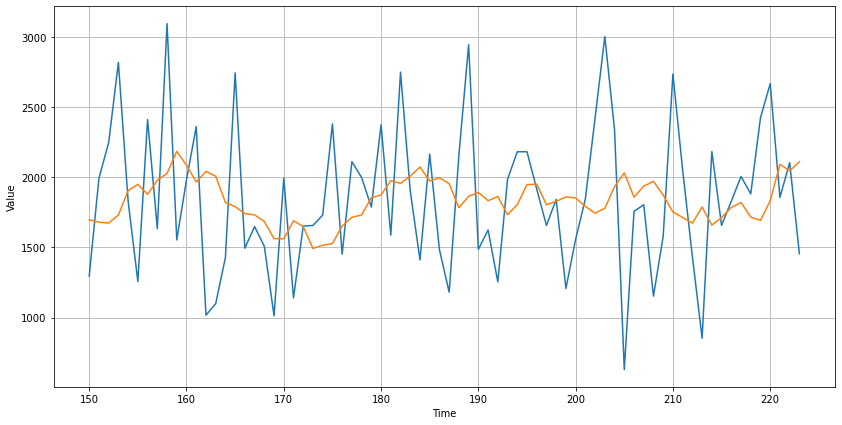

In [120]:
# 7 days (week) moving average
moving_avg = moving_average_forecast(salesA, 7)[split_time - 7:]

plt.figure(figsize=(14, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

print(f'\nMSE(moving_avg) = {np.array(mse(x_valid, moving_avg))}')

###  Smoothing <a id="80"></a>  [^](#T)<br>

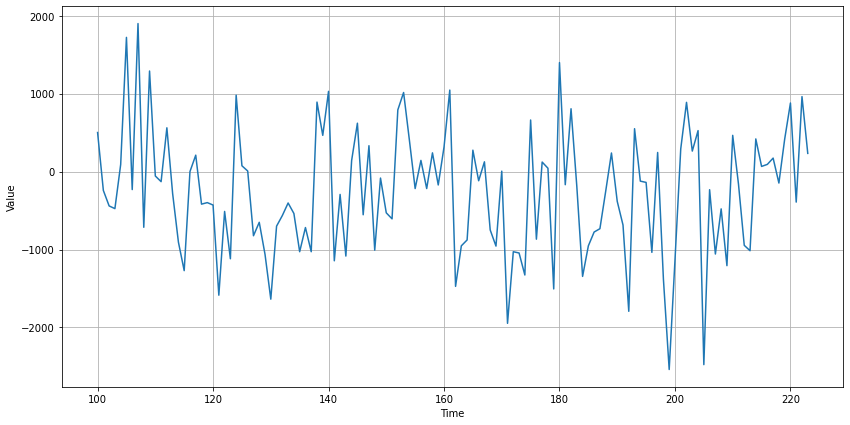

In [36]:
diff_series = (salesA[100:] - salesA[:-100])
diff_time = time[100:]
plt.figure(figsize=(14, 7))
plot_series(diff_time, diff_series)
plt.show()

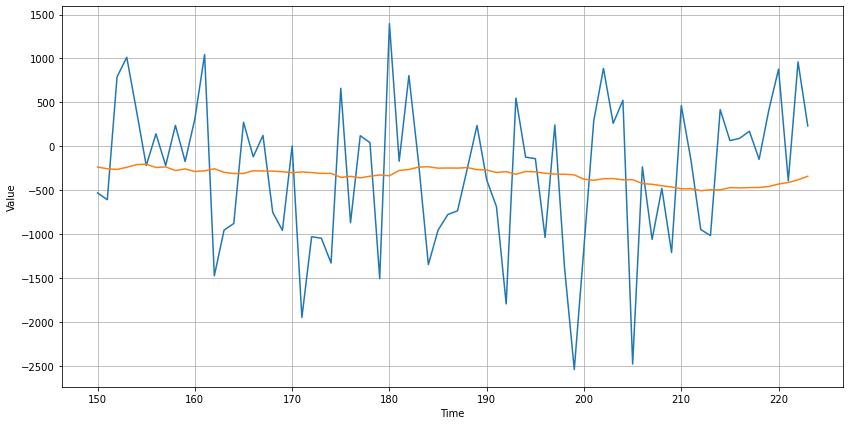

In [37]:

diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 100 - 50:]
plt.figure(figsize=(14, 7))
plot_series(time_valid, diff_series[split_time - 100:])
plot_series(time_valid, diff_moving_avg)
plt.show()

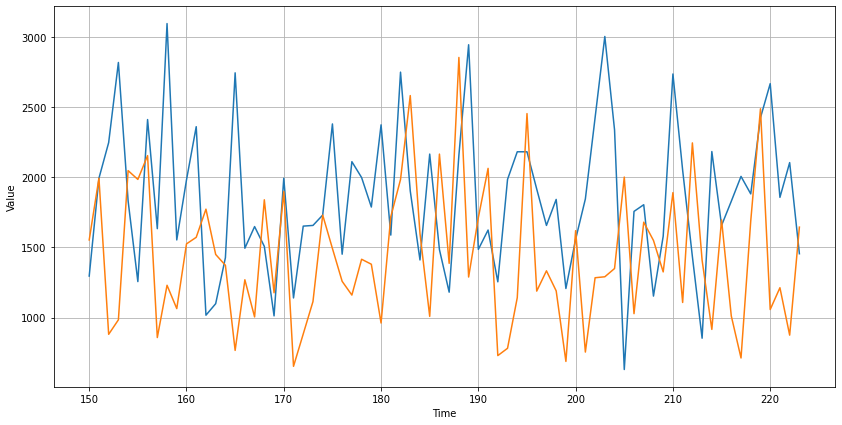


MSE(diff_moving_avg_plus_past) = 708550.9014632432


In [128]:
diff_moving_avg_plus_past = salesA[split_time - 30:-30] + diff_moving_avg

plt.figure(figsize=(14, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

print(f'\nMSE(diff_moving_avg_plus_past) = {np.array(mse(x_valid, diff_moving_avg_plus_past))}')

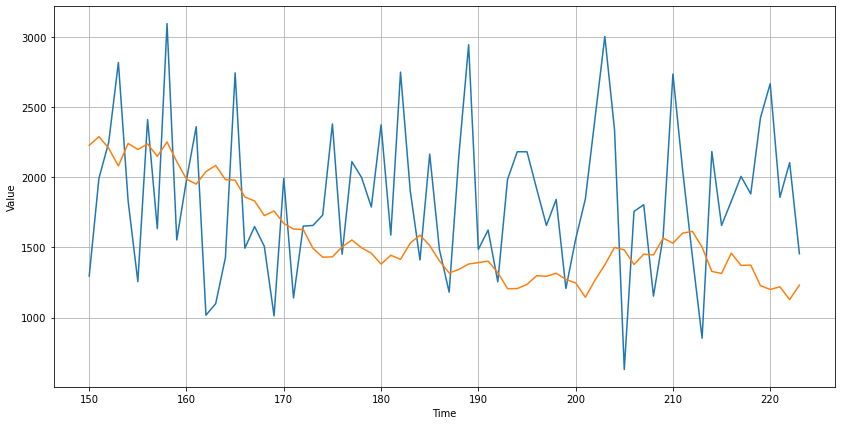


MSE(diff_moving_avg_plus_smooth_past) = 468414.95306864864


In [123]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(salesA[split_time - 60:-50], 10) + diff_moving_avg

plt.figure(figsize=(14, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

print(f'\nMSE(diff_moving_avg_plus_smooth_past) = {np.array(mse(x_valid, diff_moving_avg_plus_smooth_past))}')

### ARIMA Model <a id="81"></a>                  [^](#T)<br>

In [53]:
daily_sales.Sales_A

Date
2020-07-31    2197.6
2020-08-01    1797.4
2020-08-02    1977.8
2020-08-03    3216.0
2020-08-04    1722.0
               ...  
2021-03-07    2423.9
2021-03-08    2666.6
2021-03-09    1856.5
2021-03-10    2104.1
2021-03-11    1454.7
Name: Sales_A, Length: 224, dtype: float64

In [54]:
adf_test = daily_sales.Sales_A
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.0159


smaller than 0.05 so it is significant

In [55]:
adf_test = daily_sales.Sales_A.diff()
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.0000


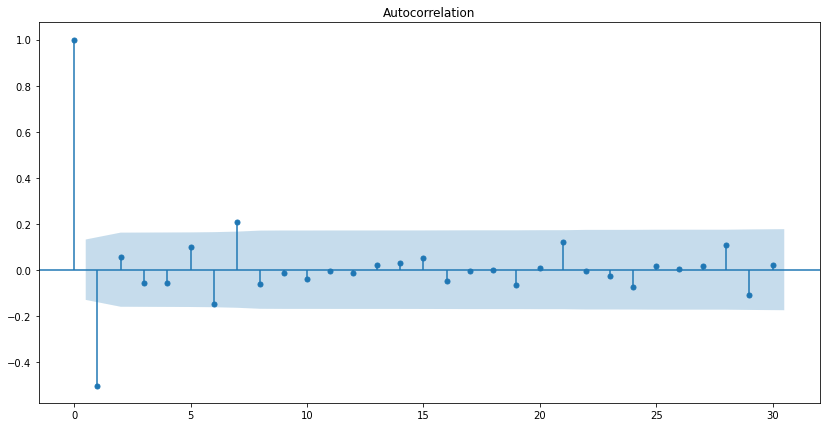

In [56]:
plot_acf(daily_sales.Sales_A.diff().dropna(), alpha=0.05, lags=30)
plt.show()

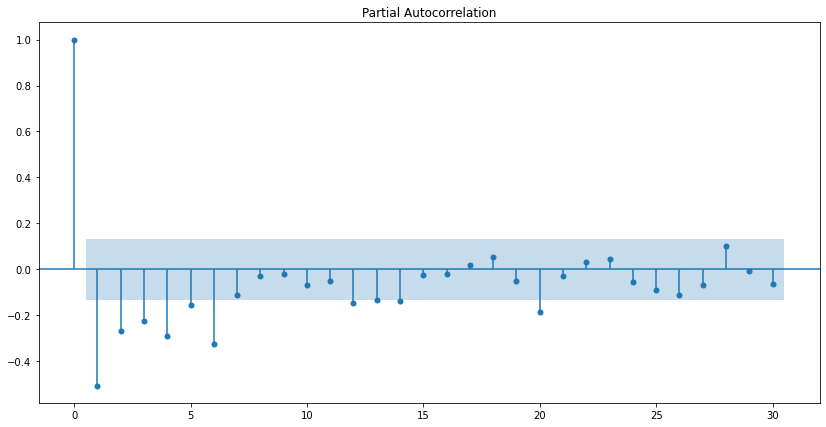

In [57]:
plot_pacf(daily_sales.Sales_A.diff().dropna(), alpha=0.05, lags=30)
plt.show()

In [58]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_A, order=(3,1,1))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                Sales_A   No. Observations:                  224
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1726.927
Date:                Sat, 20 Mar 2021   AIC                           3463.855
Time:                        09:38:08   BIC                           3480.891
Sample:                    07-31-2020   HQIC                          3470.732
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0162      0.080     -0.203      0.839      -0.172       0.140
ar.L2         -0.0014      0.076     -0.018      0.986      -0.150       0.148
ar.L3         -0.1002      0.071     -1.404      0.1

                               SARIMAX Results                                
Dep. Variable:                Sales_A   No. Observations:                  224
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1726.927
Date:                Sat, 20 Mar 2021   AIC                           3463.855
Time:                        09:38:08   BIC                           3480.891
Sample:                    07-31-2020   HQIC                          3470.732
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0162      0.080     -0.203      0.839      -0.172       0.140
ar.L2         -0.0014      0.076     -0.018      0.986      -0.150       0.148
ar.L3         -0.1002      0.071     -1.404      0.1

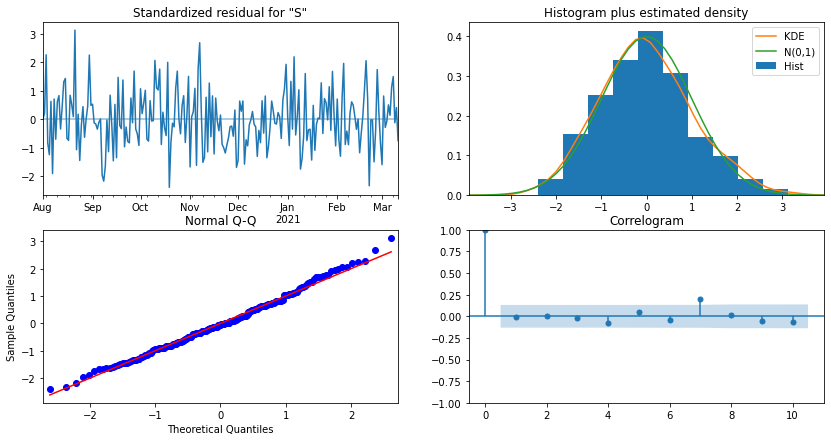

In [59]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_A, order=(3,1,1))
fit_res = mod.fit(disp=False, maxiter=250)

print(fit_res.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = fit_res.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(fit_res.resid))
# Print mean absolute error
print("################################")
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
fit_res.plot_diagnostics()
plt.show()

In [60]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_A, order=(0,1,1))
res = mod.fit(disp=False)
print(res.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = fit_res.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

                               SARIMAX Results                                
Dep. Variable:                Sales_A   No. Observations:                  224
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1727.874
Date:                Sat, 20 Mar 2021   AIC                           3459.747
Time:                        09:38:09   BIC                           3466.562
Sample:                    07-31-2020   HQIC                          3462.498
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9204      0.029    -31.583      0.000      -0.978      -0.863
sigma2      3.115e+05   3.02e+04     10.322      0.000    2.52e+05    3.71e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

prob(Q) not significant.=> zero autocorrelation 
jarqueber not significant=> close to normal

################################
Mean Absolute Error (MAE): 451.50


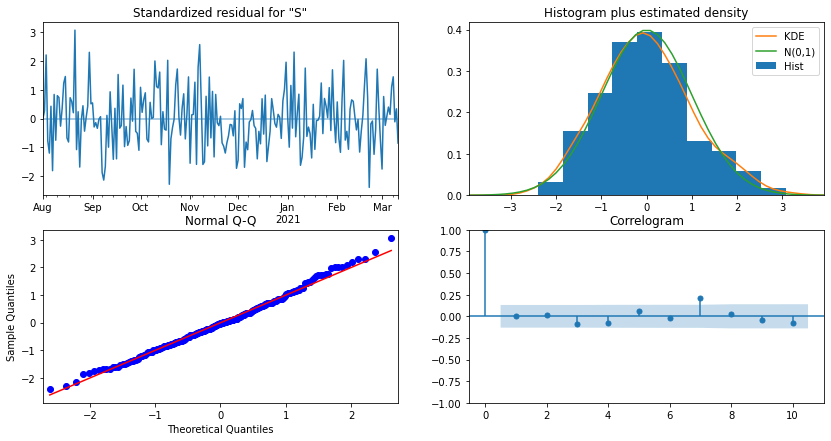

In [61]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_A, order=(0,1,1))
fit_res = mod.fit(disp=False, maxiter=250)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(fit_res.resid))
# Print mean absolute error
print("################################")
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
fit_res.plot_diagnostics()
plt.show()

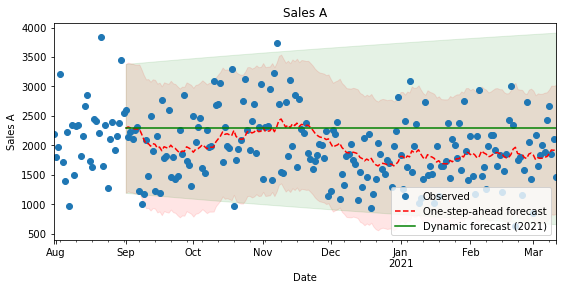

In [62]:
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_A, order=(0,1,1))
res = mod.filter(fit_res.params)

# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

# Dynamic predictions
predict_dy = res.get_prediction(dynamic='2020-09-01')
#print(predict_dy)
predict_dy_ci = predict_dy.conf_int()

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Sales A', xlabel='Date', ylabel='Sales A')

# Plot data points
daily_sales.Sales_A.plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-09-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-09-01':].plot(ax=ax, style='g', label='Dynamic forecast (2021)')
ci = predict_dy_ci.loc['2020-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

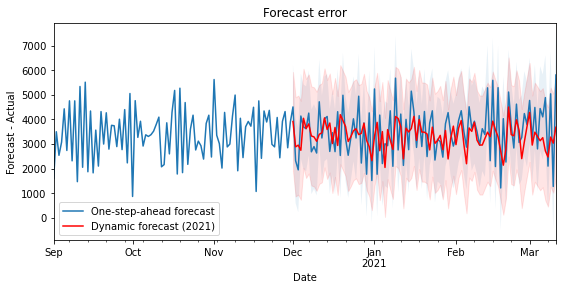

In [126]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - daily_sales.Sales_A
predict_error.loc['2020-09-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['2020-09-01':].copy()
ci.iloc[:,0] -= daily_sales.Sales_A.loc['2020-12-01':]
ci.iloc[:,1] -= daily_sales.Sales_A.loc['2020-12-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - daily_sales.Sales_A
predict_dy_error.loc['2020-12-01':].plot(ax=ax, style='r', label='Dynamic forecast (2021)')
ci = predict_dy_ci.loc['2020-12-01':].copy()
ci.iloc[:,0] -= daily_sales.Sales_A.loc['2020-12-01':]
ci.iloc[:,1] -= daily_sales.Sales_A.loc['2020-12-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

##  Sales B <a id="82"></a>  [^](#T)<br>

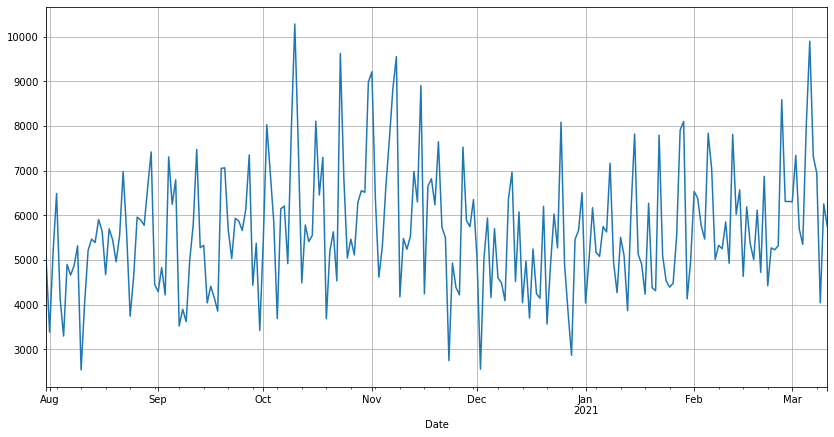

In [64]:
plt.figure(figsize=(14, 7))
daily_sales.Sales_B.plot(grid=True)
plt.show()

**Check for stationarity** <a id="83"></a>  [^](#T)<br>

In [70]:
daily_sales.Sales_B

Date
2020-07-31    5025.0
2020-08-01    3383.3
2020-08-02    5167.6
2020-08-03    6486.2
2020-08-04    4141.0
               ...  
2021-03-07    7317.7
2021-03-08    6938.8
2021-03-09    4037.7
2021-03-10    6251.7
2021-03-11    5746.6
Name: Sales_B, Length: 224, dtype: float64

In [71]:
adf_test = daily_sales.Sales_B
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.2851


Not stationary. we do one more difference. 

In [67]:
adf_test = daily_sales.Sales_B.diff()
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.0000


Stationary now. 

**Draw the autocorrelation  and partial autocorrelation graphs** <a id="84"></a>  [^](#T)<br>

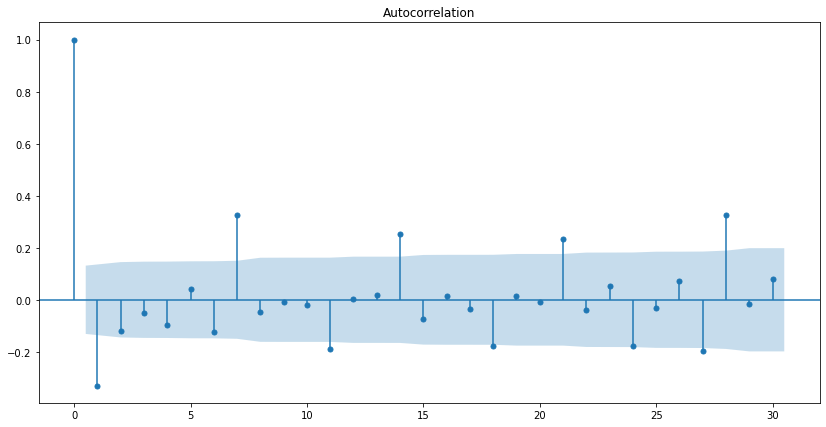

In [68]:
plot_acf(daily_sales.Sales_B.diff().dropna(), alpha=0.05, lags=30)
plt.show()

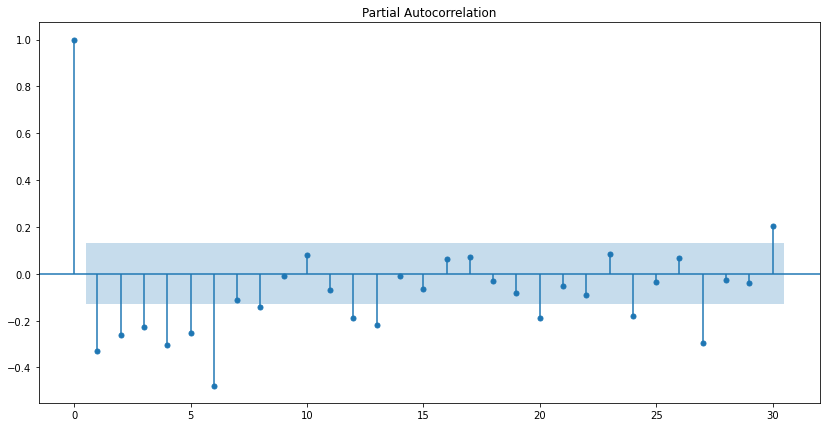

In [72]:
plot_pacf(daily_sales.Sales_B.diff().dropna(), alpha=0.05, lags=30)
plt.show()

**Grid Search Over Parameters** <a id="85"></a>  [^](#T)<br>

In [73]:
search_data = daily_sales.Sales_B.diff().dropna()
search_data_d = 0
order_aic_bic =[]
# Loop over AR order
for p in range(4):
    # Loop over MA order
    for q in range(4):
        # Fit model
        model = SARIMAX(search_data, order=(p,search_data_d,q))
        results = model.fit()
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
        
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print("Model order and AIC/BIC score (Sorted by AIC):\n", order_df.sort_values(by=['AIC', 'BIC']))
print("\nModel order and AIC/BIC score (Sorted by BIC):\n", order_df.sort_values(by=['BIC', 'AIC']))

Model order and AIC/BIC score (Sorted by AIC):
     p  q          AIC          BIC
13  3  1  3845.867271  3862.903130
9   2  1  3849.979971  3863.608658
2   0  2  3850.720306  3860.941822
11  2  3  3851.062123  3871.505154
6   1  2  3851.283871  3864.912558
15  3  3  3851.698239  3875.548441
3   0  3  3851.850068  3865.478755
5   1  1  3851.970765  3862.192280
7   1  3  3852.053795  3869.089654
10  2  2  3852.056519  3869.092378
14  3  2  3852.639255  3873.082285
1   0  1  3857.075948  3863.890291
12  3  0  3903.542131  3917.170819
8   2  0  3912.650352  3922.871867
4   1  0  3925.779246  3932.593589
0   0  0  3949.403035  3952.810207

Model order and AIC/BIC score (Sorted by BIC):
     p  q          AIC          BIC
2   0  2  3850.720306  3860.941822
5   1  1  3851.970765  3862.192280
13  3  1  3845.867271  3862.903130
9   2  1  3849.979971  3863.608658
1   0  1  3857.075948  3863.890291
6   1  2  3851.283871  3864.912558
3   0  3  3851.850068  3865.478755
7   1  3  3852.053795  3869.

In [74]:
search_data = daily_sales.Sales_B.dropna()
search_data_d = 1
order_aic_bic =[]
# Loop over AR order
for p in range(4):
    # Loop over MA order
    for q in range(4):
        # Fit model
        model = SARIMAX(search_data, order=(p,search_data_d,q))
        results = model.fit()
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
        
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print("Model order and AIC/BIC score (Sorted by AIC):\n", order_df.sort_values(by=['AIC', 'BIC']))
print("\nModel order and AIC/BIC score (Sorted by BIC):\n", order_df.sort_values(by=['BIC', 'AIC']))

Model order and AIC/BIC score (Sorted by AIC):
     p  q          AIC          BIC
13  3  1  3848.042979  3865.078838
9   2  1  3852.582769  3866.211456
2   0  2  3852.592792  3862.814308
6   1  2  3853.858986  3867.487673
5   1  1  3853.914346  3864.135861
7   1  3  3854.206211  3871.242070
10  2  2  3854.215548  3871.251407
3   0  3  3854.294507  3867.923194
14  3  2  3854.661945  3875.104975
11  2  3  3855.083228  3875.526259
15  3  3  3855.125964  3878.976167
1   0  1  3859.174984  3865.989327
12  3  0  3904.915789  3918.544476
8   2  0  3912.762598  3922.984113
4   1  0  3924.814965  3931.629309
0   0  0  3949.405270  3952.812442

Model order and AIC/BIC score (Sorted by BIC):
     p  q          AIC          BIC
2   0  2  3852.592792  3862.814308
5   1  1  3853.914346  3864.135861
13  3  1  3848.042979  3865.078838
1   0  1  3859.174984  3865.989327
9   2  1  3852.582769  3866.211456
6   1  2  3853.858986  3867.487673
3   0  3  3854.294507  3867.923194
7   1  3  3854.206211  3871.

                               SARIMAX Results                                
Dep. Variable:                Sales_B   No. Observations:                  224
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1918.468
Date:                Sat, 20 Mar 2021   AIC                           3848.936
Time:                        09:43:34   BIC                           3869.379
Sample:                    07-31-2020   HQIC                          3857.189
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.1915     10.320      0.988      0.323     -10.035      30.418
ar.L1          0.1443      0.082      1.756      0.079      -0.017       0.305
ar.L2         -0.1142      0.081     -1.416      0.1

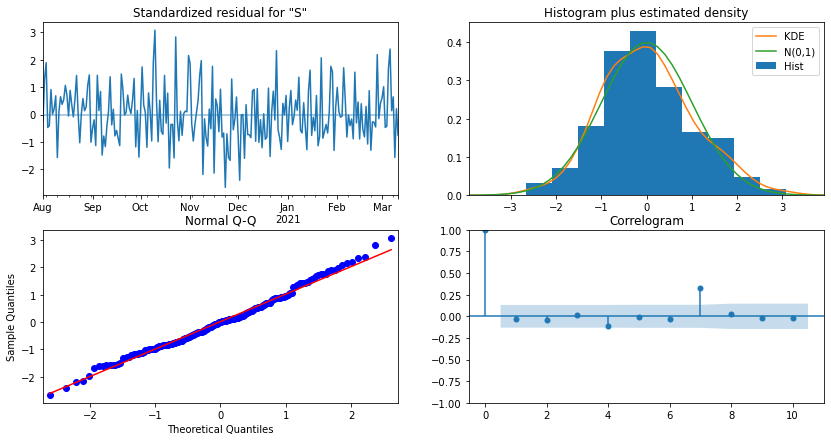

In [75]:
#we try first one p=3,q=1, diff=1
arima_data = daily_sales.Sales_B
arima = SARIMAX(arima_data, order=(3,1,1),trend='c') 

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

ar1, ar2 and intercept are not significant. we take them. 

                               SARIMAX Results                                
Dep. Variable:                Sales_B   No. Observations:                  224
Model:             SARIMAX([3], 1, 1)   Log Likelihood               -1922.353
Date:                Sat, 20 Mar 2021   AIC                           3850.707
Time:                        09:43:50   BIC                           3860.928
Sample:                    07-31-2020   HQIC                          3854.833
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L3         -0.2242      0.077     -2.897      0.004      -0.376      -0.073
ma.L1         -0.8805      0.036    -24.713      0.000      -0.950      -0.811
sigma2      1.776e+06    1.6e+05     11.137      0.0

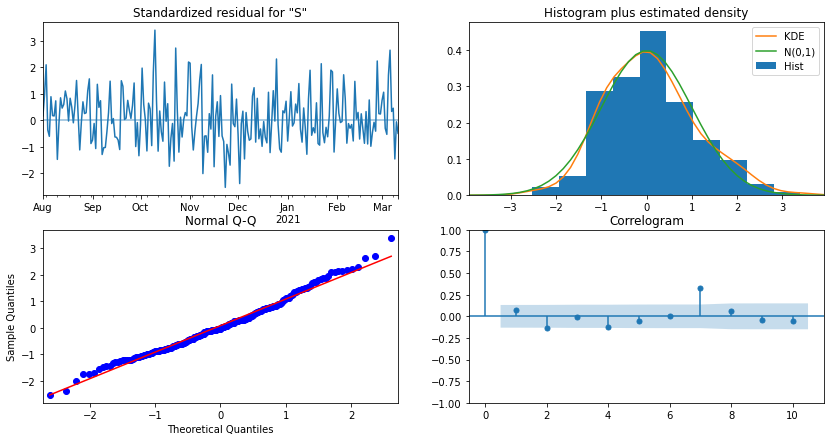

In [76]:
#we use first one p=3,q=1, diff=1
arima_data = daily_sales.Sales_B
arima = SARIMAX(arima_data, order=((0,0,1),1,1)) 

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

prob(Q) not significant.=> zero autocorrelation 
jarqueber not significant=> close to normal

                               SARIMAX Results                                
Dep. Variable:                Sales_B   No. Observations:                  224
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1922.785
Date:                Sat, 20 Mar 2021   AIC                           3853.569
Time:                        09:44:27   BIC                           3867.198
Sample:                    07-31-2020   HQIC                          3859.071
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.6006      7.590      1.001      0.317      -7.275      22.477
ma.L1         -0.7235      0.070    -10.281      0.000      -0.861      -0.586
ma.L2         -0.1995      0.075     -2.643      0.0

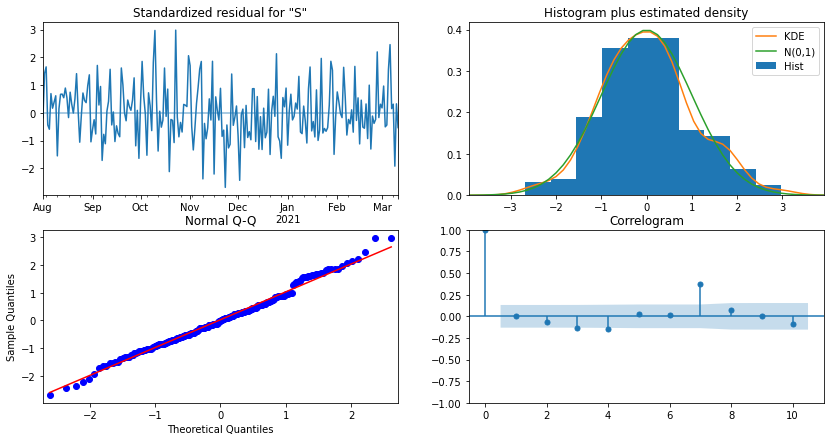

In [77]:
#we try second one p=0,q=2, diff=1
arima_data = daily_sales.Sales_B
arima = SARIMAX(arima_data, order=(0,1,2),trend='c') 

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

Intercept is not significant. we take that. 

                               SARIMAX Results                                
Dep. Variable:                Sales_B   No. Observations:                  224
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1923.296
Date:                Sat, 20 Mar 2021   AIC                           3852.593
Time:                        09:44:34   BIC                           3862.814
Sample:                    07-31-2020   HQIC                          3856.719
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7190      0.068    -10.524      0.000      -0.853      -0.585
ma.L2         -0.1989      0.077     -2.595      0.009      -0.349      -0.049
sigma2      1.792e+06    1.6e+05     11.204      0.0

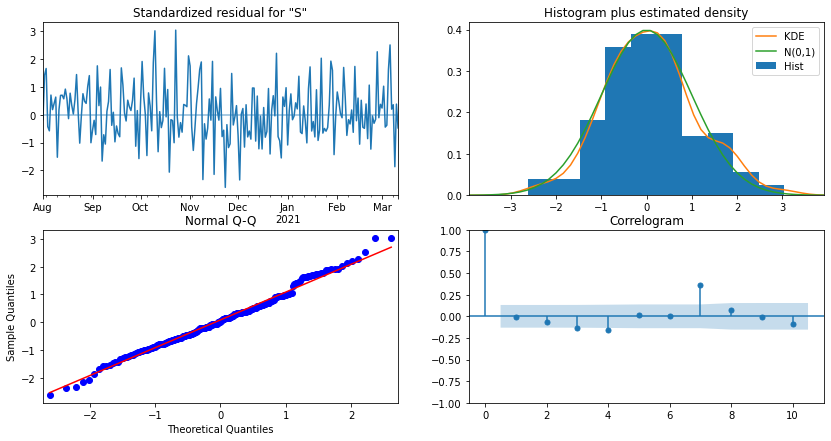

In [78]:
#we try second one p=0,q=2, diff=1
arima_data = daily_sales.Sales_B
arima = SARIMAX(arima_data, order=(0,1,2)) 

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

When we compare AIC and BIC, WE take the model arima = SARIMAX(arima_data, order=((0,0,1),1,1)) .

delta y_t = -0.8805 epsilon_t-1 + epsilon_t

In [49]:
# Create auto_arima model
#grid search
pm_model = pm.auto_arima(daily_sales.Sales_B,
                    trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                        seasonal=True, m=7) # period of seasonality
                       
# Print model summary
#print(pm_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=3832.646, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3882.843, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3847.642, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3844.590, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=4521.642, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=3849.557, Time=0.30 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=3840.983, Time=0.51 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=3832.809, Time=1.15 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=3833.479, Time=1.42 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : AIC=3842.543, Time=0.48 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=3826.421, Time=1.04 sec
 ARIMA(1,0,2)(2,0,0)[7] intercept   : AIC=3831.640, Time=0.42 sec
 ARIMA(2,0,1)(2,0,0)[7] intercept   : AIC=3826.783, Time=0.86 sec
 ARIMA(3,0,2)(2,0,0)[7] intercept   : 

**Create auto_arima model** <a id="86"></a>  [^](#T)<br>

In [79]:
# Create auto_arima model
pm_model = pm.auto_arima(daily_sales.Sales_B,
                    trace=True,
                      error_action='ignore',
                      suppress_warnings=True,information_criterion='bic',
                        seasonal=True, m=7)
                       
# Print model summary
#print(pm_model.summary())

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : BIC=3859.939, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : BIC=3889.667, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : BIC=3861.288, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : BIC=3858.236, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[7]             : BIC=4525.054, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : BIC=3878.084, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : BIC=3863.387, Time=0.12 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : BIC=3850.793, Time=0.30 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : BIC=3860.133, Time=0.20 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : BIC=3855.511, Time=0.24 sec
 ARIMA(1,0,1)(0,0,2)[7] intercept   : BIC=3860.378, Time=0.14 sec
 ARIMA(0,0,2)(0,0,2)[7] intercept   : BIC=3855.899, Time=0.37 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : BIC=3852.984, Time=0.31 sec
 ARIMA(1,0,2)(0,0,2)[7] intercept   : BIC=3864.601, Time=0.24 sec
 ARIMA(0,0,1)(0,0,2)[7]          

                                     SARIMAX Results                                      
Dep. Variable:                            Sales_B   No. Observations:                  224
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 7)   Log Likelihood               -1906.956
Date:                            Sat, 20 Mar 2021   AIC                           3825.912
Time:                                    09:54:59   BIC                           3846.382
Sample:                                07-31-2020   HQIC                          3834.174
                                     - 03-11-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4571.3927   1049.529      4.356      0.000    2514.354    6628.431
ar.L1         -0.5765      0.256   

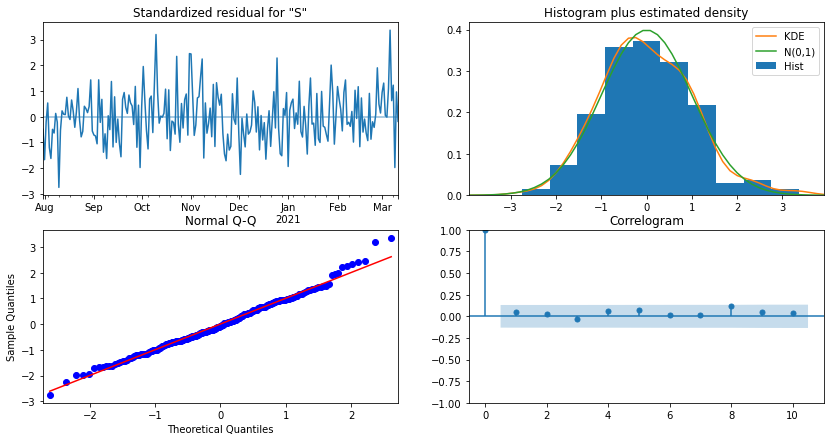

In [85]:
#we take this one. 
arima_data = daily_sales.Sales_B
arima = SARIMAX(arima_data, order=(1,0,1), trend = 'c' , seasonal_order=(2,0,0,7))

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 12 values
arima_value_forecast = arima_results.get_forecast(steps=12).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

                                       SARIMAX Results                                        
Dep. Variable:                                Sales_B   No. Observations:                  224
Model:             SARIMAX(0, 0, 1)x(0, 0, [1, 2], 7)   Log Likelihood               -1911.867
Date:                                Sat, 20 Mar 2021   AIC                           3833.735
Time:                                        09:55:25   BIC                           3850.793
Sample:                                    07-31-2020   HQIC                          3840.620
                                         - 03-11-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5637.9873    160.864     35.048      0.000    5322.699    5953.275
ma.

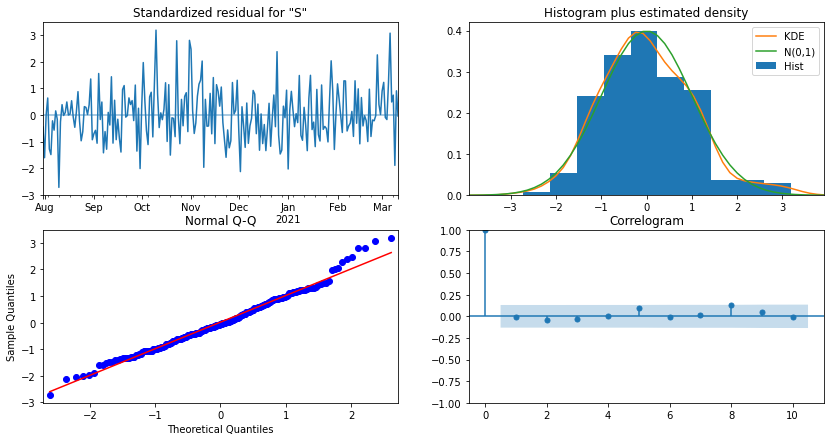

In [86]:
arima_data = daily_sales.Sales_B
arima = SARIMAX(arima_data, order=(0,0,1), trend= 'c', seasonal_order=(0,0,2,7))

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 12 values
arima_value_forecast = arima_results.get_forecast(steps=12).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

In [87]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_B, order=(1,0,1),trend = 'c', seasonal_order=(2,0,0,7))
res = mod.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Sales_B   No. Observations:                  224
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 7)   Log Likelihood               -1906.956
Date:                            Sat, 20 Mar 2021   AIC                           3825.912
Time:                                    09:55:54   BIC                           3846.382
Sample:                                07-31-2020   HQIC                          3834.174
                                     - 03-11-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4571.3927   1049.529      4.356      0.000    2514.354    6628.431
ar.L1         -0.5765      0.256   

################################
Mean Absolute Error (MAE): 675.73


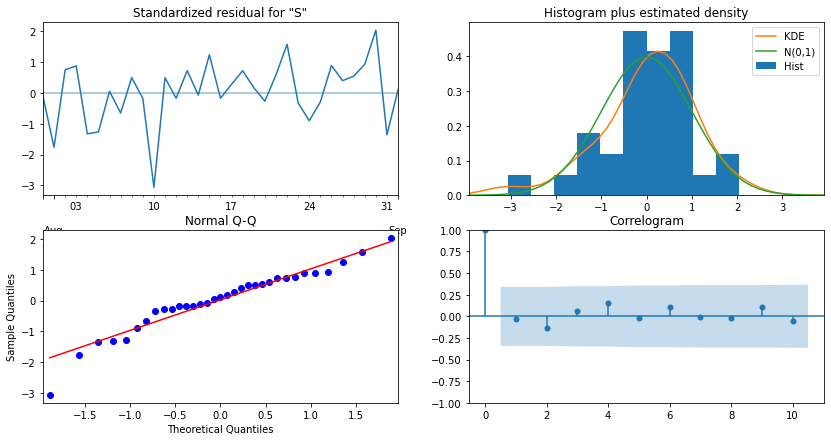

In [83]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_B.loc[:'2020-09-01'], order=(1,0,1),trend = 'c', seasonal_order=(2,0,0,7))
fit_res = mod.fit(disp=False, maxiter=250)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(fit_res.resid))
# Print mean absolute error
print("################################")
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
fit_res.plot_diagnostics()
plt.show()

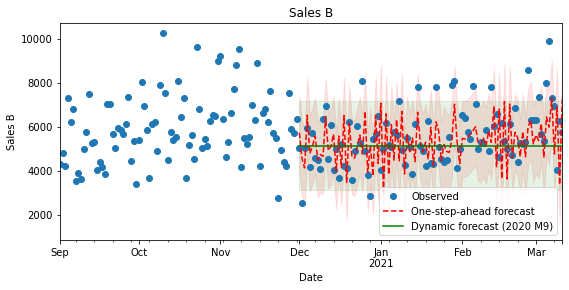

In [129]:
mod = sm.tsa.statespace.SARIMAX(daily_sales.Sales_B, order=(1,0,1),trend = 'c', seasonal_order=(2,0,0,7) ) #, trend = 'c' 
res = mod.filter(fit_res.params)
data = daily_sales.Sales_B
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

# Dynamic predictions
predict_dy = res.get_prediction(dynamic='2020-09-01')
predict_dy_ci = predict_dy.conf_int()

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Sales B', xlabel='Date', ylabel='Sales B')

# Plot data points
data.loc['2020-09-01':].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2020-12-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2020-12-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2020-12-01':].plot(ax=ax, style='g', label='Dynamic forecast (2020 M9)')
ci = predict_dy_ci.loc['2020-12-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

##  Sales C <a id="87"></a>  [^](#T)<br>

In [90]:
daily_sales.Sales_C

Date
2020-07-31    1005.3
2020-08-01    1294.0
2020-08-02     941.4
2020-08-03    1367.8
2020-08-04     933.2
               ...  
2021-03-07    2768.3
2021-03-08    1787.6
2021-03-09    2415.7
2021-03-10    2886.4
2021-03-11    2171.4
Name: Sales_C, Length: 224, dtype: float64

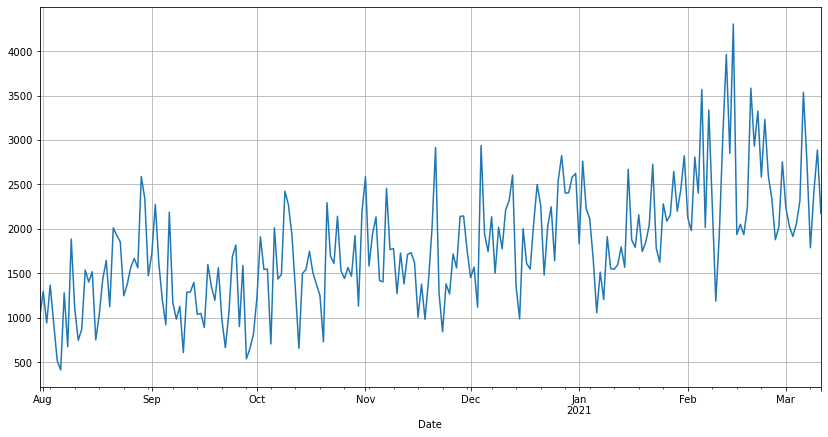

In [91]:
plt.figure(figsize=(14, 7))
daily_sales.Sales_C.plot(grid=True)
plt.show()

**Check for stationarity** <a id="88"></a>  [^](#T)<br>

In [92]:
adf_test = daily_sales.Sales_C
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.2725


Not stationary. We take the difference.

In [93]:
adf_test = daily_sales.Sales_C.diff()
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.0000


**Draw the autocorrelation  and partial autocorrelation graphs** <a id="89"></a>  [^](#T)<br>

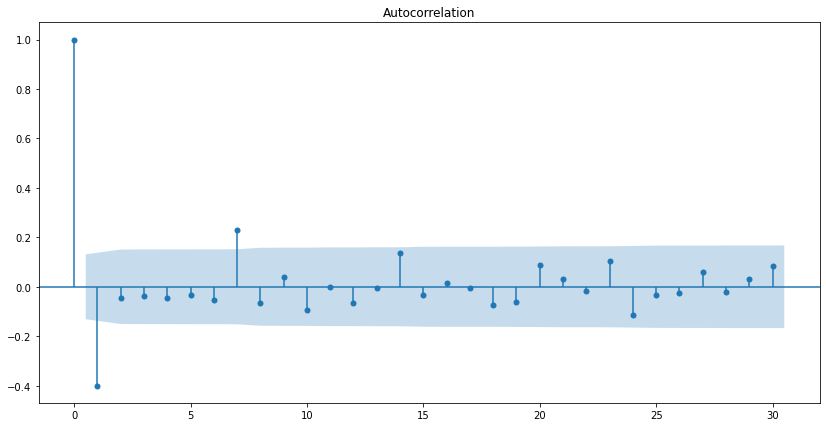

In [63]:
plot_acf(daily_sales.Sales_C.diff().dropna(), alpha=0.05, lags=30)
plt.show()

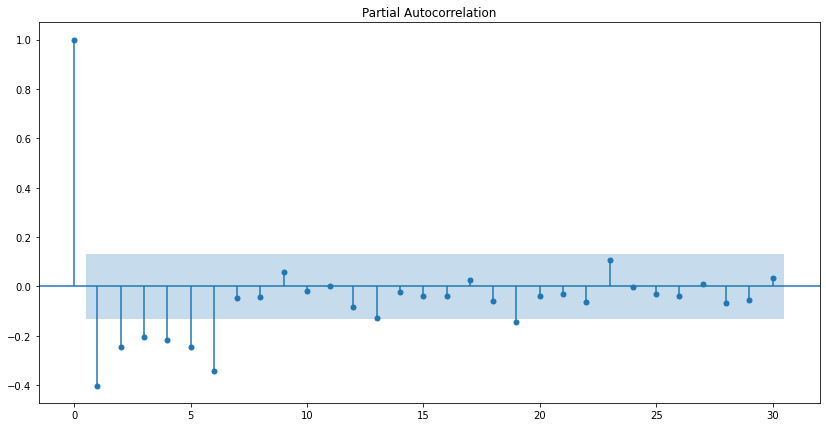

In [94]:
plot_pacf(daily_sales.Sales_C.diff().dropna(), alpha=0.05, lags=30)
plt.show()

Autocorrelation cuts off and partial autocorrelation tails off. 

In [95]:
search_data = daily_sales.Sales_C.diff().dropna()
search_data_d = 0 
order_aic_bic =[]
# Loop over AR order
for p in range(4): 
    # Loop over MA order
    for q in range(4):
        # Fit model
        model = SARIMAX(search_data, order=(p,search_data_d,q))
        results = model.fit()
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
        
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print("Model order and AIC/BIC score (Sorted by AIC):\n", order_df.sort_values(by=['AIC', 'BIC']))
print("\nModel order and AIC/BIC score (Sorted by BIC):\n", order_df.sort_values(by=['BIC', 'AIC']))

Model order and AIC/BIC score (Sorted by AIC):
     p  q          AIC          BIC
11  2  3  3405.628092  3426.071123
15  3  3  3407.866917  3431.717120
5   1  1  3423.017745  3433.239260
2   0  2  3423.291668  3433.513183
3   0  3  3424.998286  3438.626973
9   2  1  3425.017536  3438.646223
6   1  2  3425.017628  3438.646315
14  3  2  3425.656930  3446.099960
13  3  1  3425.984243  3443.020102
1   0  1  3426.538930  3433.353274
7   1  3  3426.957808  3443.993666
10  2  2  3427.103865  3444.139724
12  3  0  3456.866483  3470.495170
8   2  0  3463.779684  3474.001199
4   1  0  3475.296083  3482.110426
0   0  0  3512.137113  3515.544284

Model order and AIC/BIC score (Sorted by BIC):
     p  q          AIC          BIC
11  2  3  3405.628092  3426.071123
15  3  3  3407.866917  3431.717120
5   1  1  3423.017745  3433.239260
1   0  1  3426.538930  3433.353274
2   0  2  3423.291668  3433.513183
3   0  3  3424.998286  3438.626973
9   2  1  3425.017536  3438.646223
6   1  2  3425.017628  3438.

p=2 and q=3 for both of them. 

                               SARIMAX Results                                
Dep. Variable:                Sales_C   No. Observations:                  224
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1708.510
Date:                Sat, 20 Mar 2021   AIC                           3431.019
Time:                        10:06:27   BIC                           3454.870
Sample:                    07-31-2020   HQIC                          3440.648
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.0292     15.400      1.430      0.153      -8.155      52.214
ar.L1         -1.2434      0.161     -7.705      0.000      -1.560      -0.927
ar.L2         -0.8052      0.199     -4.054      0.0

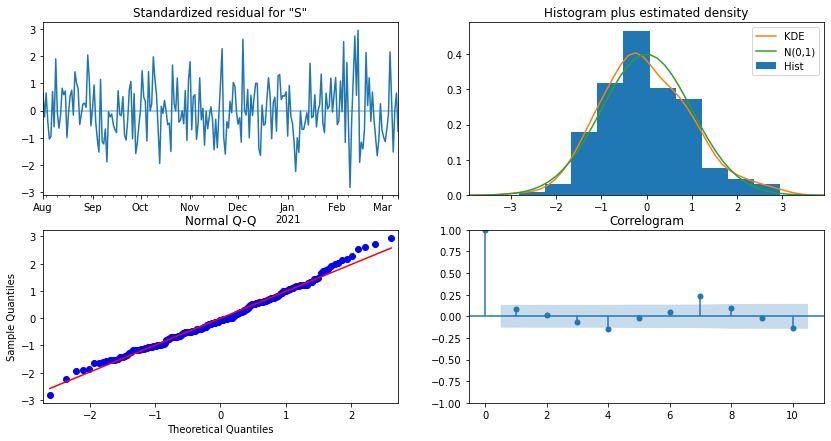

In [96]:
arima_data = daily_sales.Sales_C
arima = SARIMAX(arima_data, order=(2,1,3),trend = 'c')

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

prob(Q) not significant.=> zero autocorrelation 
jarqueber not significant=> close to normal

## Sales Total <a id="90"></a>  [^](#T)<br>

In [97]:
daily_sales.Sales_Total

Date
2020-07-31     8227.9
2020-08-01     6474.7
2020-08-02     8086.8
2020-08-03    11070.0
2020-08-04     6796.2
               ...   
2021-03-07    12509.9
2021-03-08    11393.0
2021-03-09     8309.9
2021-03-10    11242.2
2021-03-11     9372.7
Name: Sales_Total, Length: 224, dtype: float64

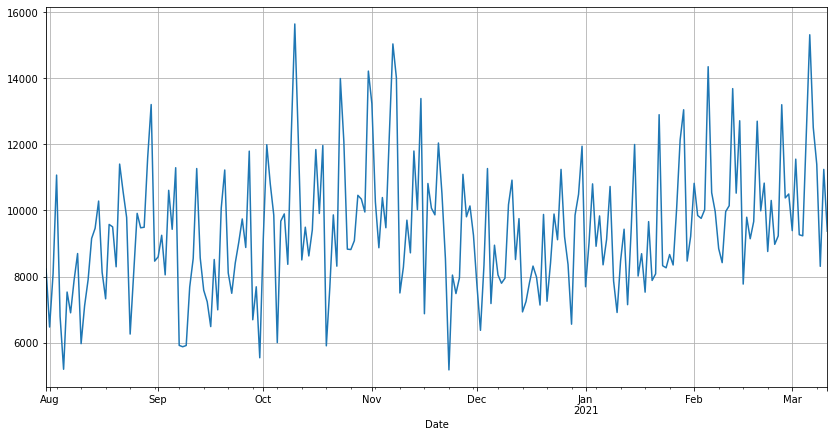

In [98]:
plt.figure(figsize=(14, 7))
daily_sales.Sales_Total.plot(grid=True)
plt.show()

### Seasonal and Trend Decomposition using Loess (STL) <a id="91"></a>  [^](#T)<br>

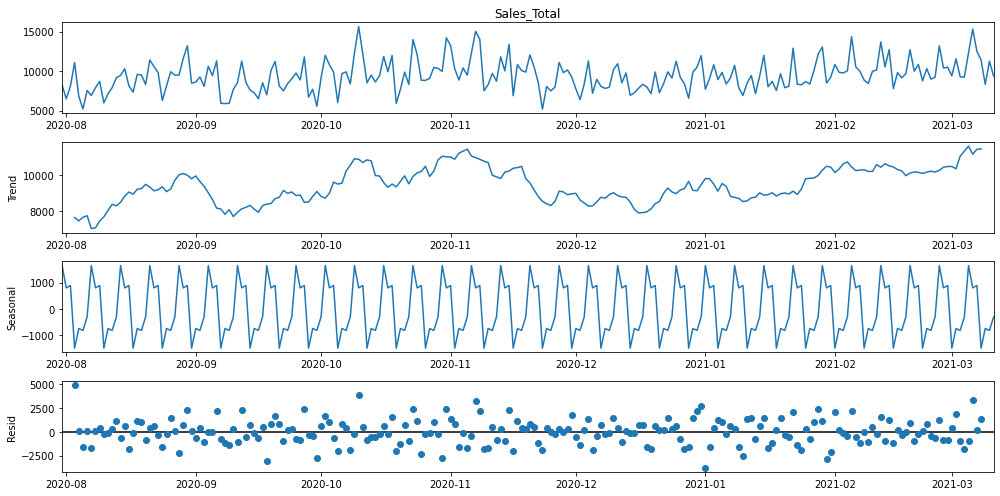

In [99]:
# Decompose data
decomp_results = seasonal_decompose(daily_sales.Sales_Total) #, freq=12

# Plot decomposed data
decomp_results.plot()
plt.show()

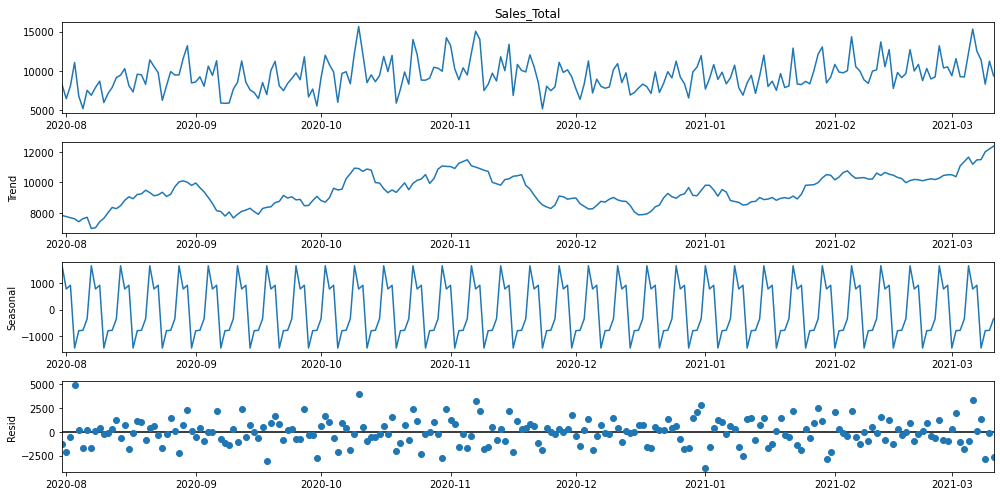

In [100]:
decomposition = sm.tsa.seasonal_decompose(daily_sales.Sales_Total, model='additive',extrapolate_trend='freq')
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()

In [101]:
stl = STL(daily_sales.Sales_Total)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

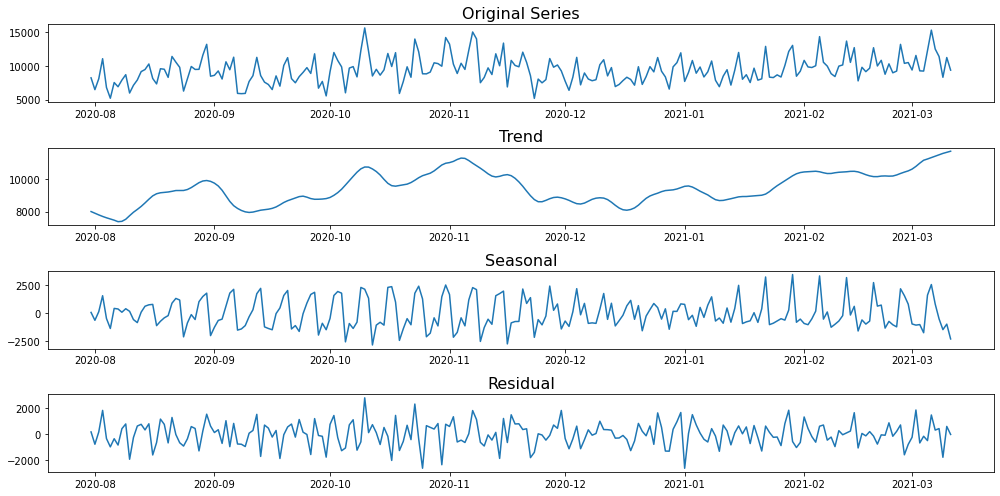

In [102]:
plt.figure(figsize=(14,7))

plt.subplot(4,1,1)
plt.plot(daily_sales.Sales_Total)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

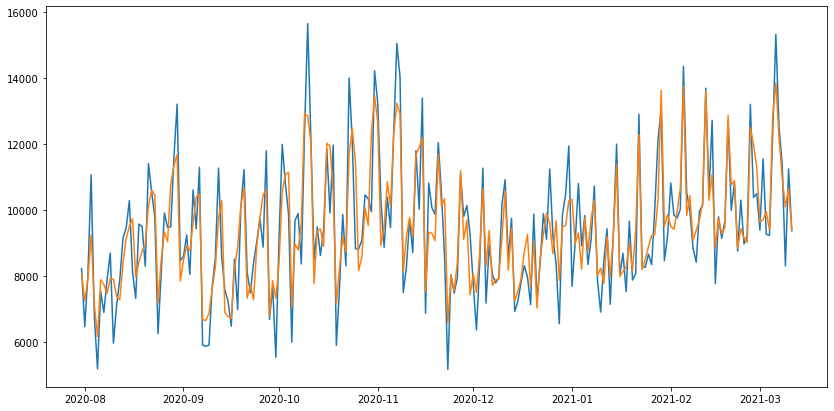

In [103]:
estimated = trend + seasonal
plt.figure(figsize = (14,7))
plt.plot(daily_sales.Sales_Total)
plt.plot(estimated)

In [104]:
print(seasonal['2021'])

Date
2021-01-01     771.256206
2021-01-02    -586.089791
2021-01-03    -197.649105
2021-01-04   -1177.747264
2021-01-05     503.290082
                 ...     
2021-03-07     800.913762
2021-03-08    -516.739235
2021-03-09   -1471.597728
2021-03-10    -984.247118
2021-03-11   -2300.158640
Name: season, Length: 70, dtype: float64


### Anomaly Detection <a id="92"></a>  [^](#T)<br>

Date
2020-10-10    15640.7
Name: Sales_Total, dtype: float64


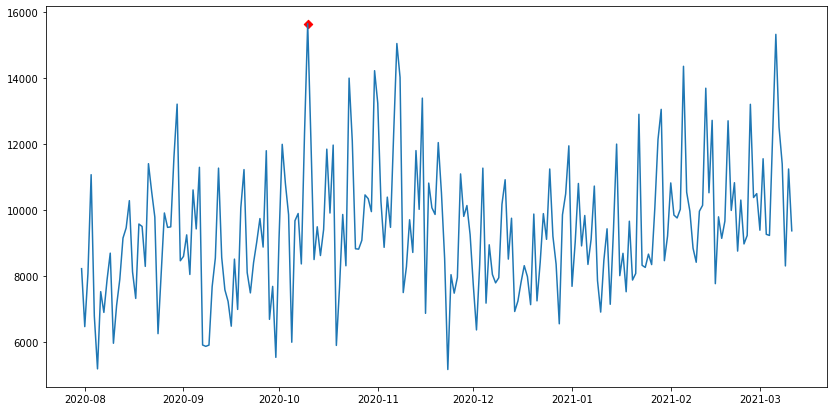

In [81]:
anomaly_detection = daily_sales.Sales_Total
stl = STL(anomaly_detection)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev


anomalies = anomaly_detection[(resid < lower) | (resid > upper)]
print(anomalies)
plt.figure(figsize=(14,7))
plt.plot(anomaly_detection)  
for i in range(len(anomalies)):
    plt.scatter(anomalies.index[i], anomalies.iloc[i], color='r', marker='D')

**Check for stationarity**  [^](#T)<br>

In [82]:
adf_test = daily_sales.Sales_Total
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.1352


Non_stationary. Take the difference.

In [105]:
adf_test = daily_sales.Sales_Total.diff()
adf_test = adf_test.dropna()
results = adfuller(adf_test)
print("The ADF p-valu is %4.4f" %(results[1]))

The ADF p-valu is 0.0000


Now stationary. 

**Draw the autocorrelation  and partial autocorrelation graphs**  [^](#T)<br>

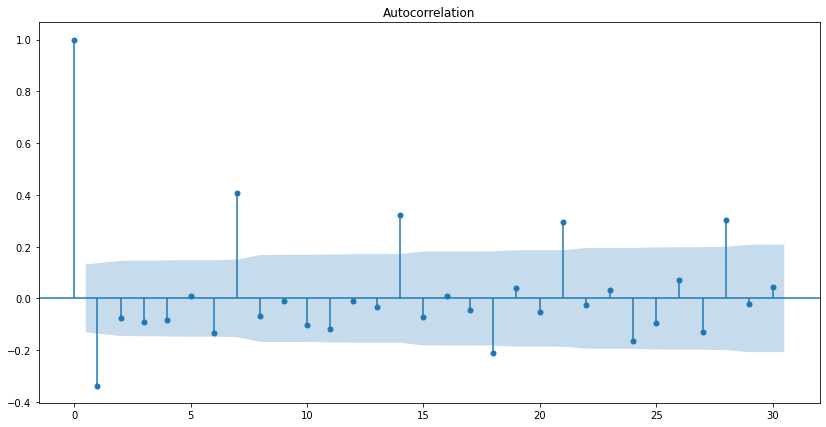

In [106]:
plot_acf(daily_sales.Sales_Total.diff().dropna(), alpha=0.05, lags=30)
plt.show()

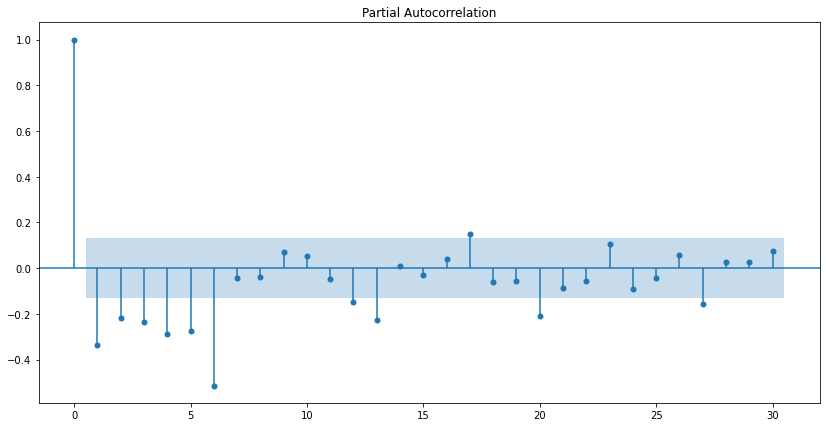

In [107]:
plot_pacf(daily_sales.Sales_Total.diff().dropna(), alpha=0.05, lags=30)
plt.show()

In [108]:
search_data = daily_sales.Sales_Total.diff().dropna()
search_data_d = 0 
order_aic_bic =[]
# Loop over AR order
for p in range(4): 
    # Loop over MA order
    for q in range(4):
        # Fit model
        model = SARIMAX(search_data, order=(p,search_data_d,q))
        results = model.fit()
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
        
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'AIC', 'BIC'])
print("Model order and AIC/BIC score (Sorted by AIC):\n", order_df.sort_values(by=['AIC', 'BIC']))
print("\nModel order and AIC/BIC score (Sorted by BIC):\n", order_df.sort_values(by=['BIC', 'AIC']))

Model order and AIC/BIC score (Sorted by AIC):
     p  q          AIC          BIC
11  2  3  3957.994753  3978.437783
15  3  3  3959.244359  3983.094561
14  3  2  3980.639807  4001.082838
13  3  1  3989.620420  4006.656279
2   0  2  3994.401861  4004.623377
7   1  3  3994.899561  4011.935420
5   1  1  3994.988304  4005.209820
9   2  1  3995.205665  4008.834352
10  2  2  3995.466602  4012.502460
6   1  2  3996.337420  4009.966107
3   0  3  3996.925185  4010.553872
1   0  1  4002.210871  4009.025215
12  3  0  4042.115570  4055.744257
8   2  0  4052.304695  4062.526211
4   1  0  4060.631736  4067.446079
0   0  0  4085.451877  4088.859048

Model order and AIC/BIC score (Sorted by BIC):
     p  q          AIC          BIC
11  2  3  3957.994753  3978.437783
15  3  3  3959.244359  3983.094561
14  3  2  3980.639807  4001.082838
2   0  2  3994.401861  4004.623377
5   1  1  3994.988304  4005.209820
13  3  1  3989.620420  4006.656279
9   2  1  3995.205665  4008.834352
1   0  1  4002.210871  4009.

In [109]:
# auto_arima model
pm_model = pm.auto_arima(daily_sales.Sales_Total,
                    trace=True,
                      error_action='ignore',
                      suppress_warnings=True
                        ) #, m=12 seasonal=True
                       

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4087.451, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4061.995, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4007.255, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4085.454, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3999.482, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4000.172, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4001.743, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3999.108, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4001.307, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3998.540, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4006.513, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4000.436, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=4

In [130]:
# auto_arima model
pm_model = pm.auto_arima(daily_sales.Sales_Total,
                    trace=True,
                      error_action='ignore',
                      suppress_warnings=True, information_criterion = 'bic'
                         ,m=7 ) #,seasonal=True

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : BIC=inf, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : BIC=4094.265, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : BIC=4034.247, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : BIC=3985.884, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[7]             : BIC=4088.861, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : BIC=4017.477, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : BIC=3951.833, Time=0.69 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : BIC=3967.837, Time=0.49 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : BIC=inf, Time=1.42 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : BIC=3957.183, Time=1.29 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : BIC=3980.959, Time=0.90 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : BIC=3964.154, Time=0.81 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : BIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : BIC=4043.083, Time=0.41 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : BIC=3958.1

                               SARIMAX Results                                
Dep. Variable:            Sales_Total   No. Observations:                  224
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1980.920
Date:                Sat, 20 Mar 2021   AIC                           3975.841
Time:                        10:14:35   BIC                           3999.691
Sample:                    07-31-2020   HQIC                          3985.469
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     92.5385     36.369      2.544      0.011      21.256     163.821
ar.L1          1.2285      0.014     88.288      0.000       1.201       1.256
ar.L2         -0.9887      0.013    -73.965      0.0

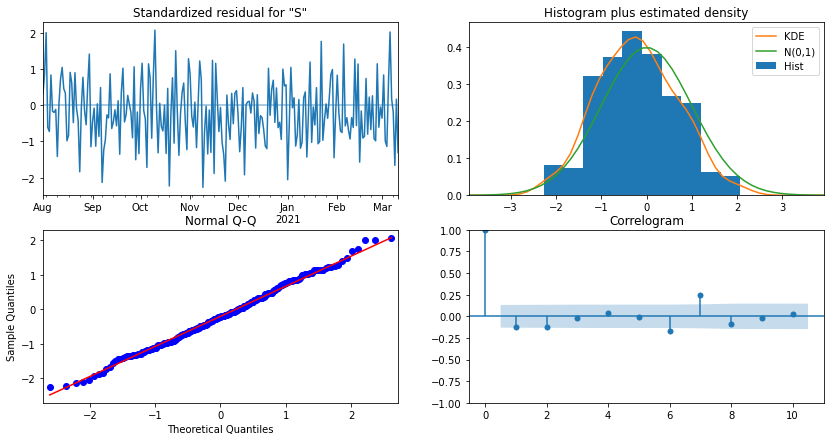

In [111]:
arima_data = daily_sales.Sales_Total
arima = SARIMAX(arima_data, order=(2,1,3),trend = 'c')

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

                               SARIMAX Results                                
Dep. Variable:            Sales_Total   No. Observations:                  224
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1996.270
Date:                Sat, 20 Mar 2021   AIC                           3998.540
Time:                        10:14:41   BIC                           4008.761
Sample:                    07-31-2020   HQIC                          4002.666
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6960      0.065    -10.638      0.000      -0.824      -0.568
ma.L2         -0.2033      0.074     -2.749      0.006      -0.348      -0.058
sigma2      3.501e+06    3.2e+05     10.934      0.0

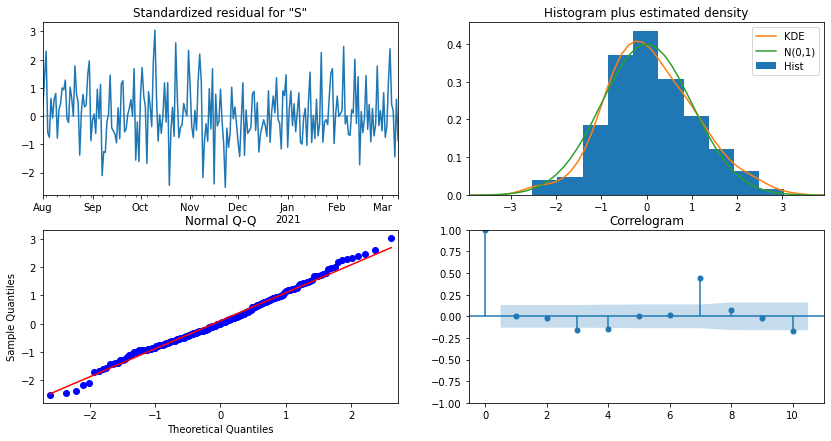

In [112]:
arima_data = daily_sales.Sales_Total
arima = SARIMAX(arima_data, order=(0,1,2)) #,trend = 'c'

# Fit ARIMA model
arima_results = arima.fit()
print(arima_results.summary())

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print("Mean Absolute Error (MAE): %4.2f" %(mae))

# Create the 4 diagostics plots
arima_results.plot_diagnostics()
plt.show()

                    STL Decomposition and SARIMAX Results                     
Dep. Variable:                      y   No. Observations:                  224
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1877.523
Date:                Sat, 20 Mar 2021   AIC                           3767.046
Time:                        10:19:39   BIC                           3787.489
Sample:                    07-31-2020   HQIC                          3775.299
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3061      0.059     -5.185      0.000      -0.422      -0.190
ar.L2         -0.7914      0.064    -12.352      0.000      -0.917      -0.666
ma.L1         -0.3370      0.059     -5.712      0.0

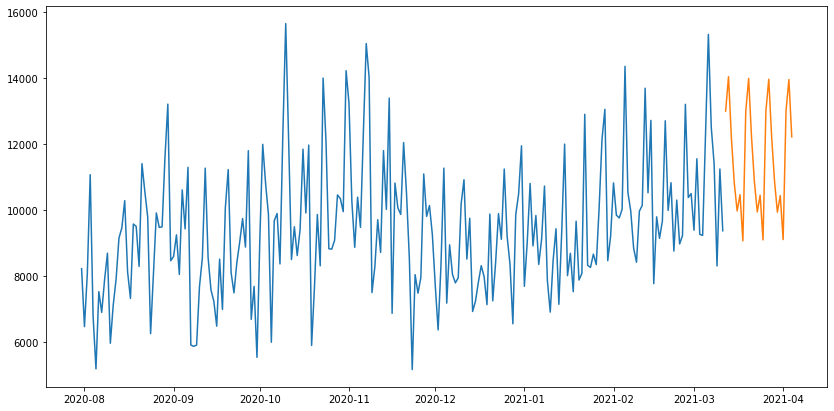

2021-03-12    12991.991373
2021-03-13    14033.576510
2021-03-14    12191.646100
2021-03-15    10826.514890
2021-03-16     9972.666732
2021-03-17    10466.676350
2021-03-18     9068.786070
2021-03-19    12983.003747
2021-03-20    13981.150297
2021-03-21    12214.804849
2021-03-22    10860.917469
2021-03-23     9943.809212
2021-03-24    10448.282065
2021-03-25     9097.254075
2021-03-26    12988.848114
2021-03-27    13956.831653
2021-03-28    12217.622648
2021-03-29    10879.301075
2021-03-30     9935.952592
2021-03-31    10436.137721
2021-04-01     9107.188852
2021-04-02    12995.418587
2021-04-03    13946.958170
2021-04-04    12215.444635
Freq: D, dtype: float64


In [113]:
stlforecast_data = daily_sales.Sales_Total
stlf = STLForecast(stlforecast_data, ARIMA, model_kwargs=dict(order=(2,1,3)))
stlf_res = stlf.fit()
print(stlf_res.summary())
forecast = stlf_res.forecast(24)
plt.figure(figsize=(14, 7))
plt.plot(stlforecast_data)
plt.plot(forecast)
plt.show()
#stlf_res.plot_diagnostics()
print(forecast)

                    STL Decomposition and SARIMAX Results                     
Dep. Variable:                      y   No. Observations:                  224
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1886.961
Date:                Sat, 20 Mar 2021   AIC                           3779.921
Time:                        02:37:45   BIC                           3790.143
Sample:                    07-31-2020   HQIC                          3784.047
                         - 03-11-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6747      0.068     -9.949      0.000      -0.808      -0.542
ma.L2         -0.0803      0.072     -1.122      0.262      -0.221       0.060
sigma2      1.318e+06   1.27e+05     10.391      0.0

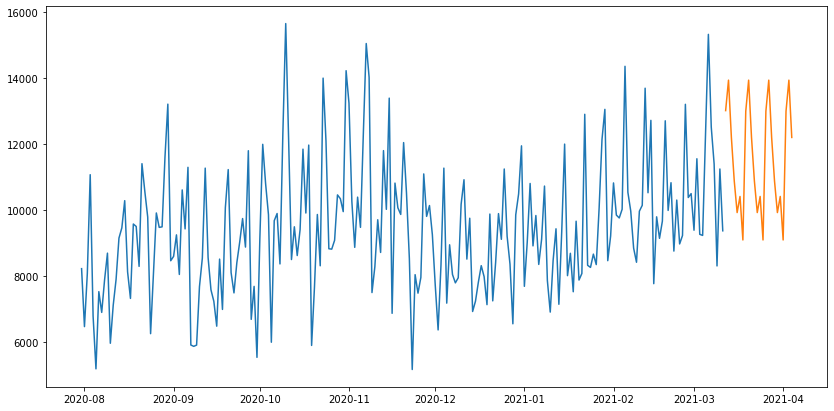

2021-03-12    13008.051027
2021-03-13    13929.477014
2021-03-14    12196.818431
2021-03-15    10879.165435
2021-03-16     9924.306942
2021-03-17    10411.657552
2021-03-18     9095.746029
2021-03-19    12990.142862
2021-03-20    13929.477014
2021-03-21    12196.818431
2021-03-22    10879.165435
2021-03-23     9924.306942
2021-03-24    10411.657552
2021-03-25     9095.746029
2021-03-26    12990.142862
2021-03-27    13929.477014
2021-03-28    12196.818431
2021-03-29    10879.165435
2021-03-30     9924.306942
2021-03-31    10411.657552
2021-04-01     9095.746029
2021-04-02    12990.142862
2021-04-03    13929.477014
2021-04-04    12196.818431
Freq: D, dtype: float64


In [96]:
stlforecast_data = daily_sales.Sales_Total
stlf = STLForecast(stlforecast_data, ARIMA, model_kwargs=dict(order=(0,1,2)))
stlf_res = stlf.fit()
print(stlf_res.summary())
forecast = stlf_res.forecast(24)
plt.figure(figsize=(14, 7))
plt.plot(stlforecast_data)
plt.plot(forecast)
plt.show()
#stlf_res.plot_diagnostics()
print(forecast)

We choose the Arima(2,1,3) model since AIC and BIC values are smaller. 

### Simple Exponential Smoothing (SES)  <a id="93"></a>  [^](#T)<br>

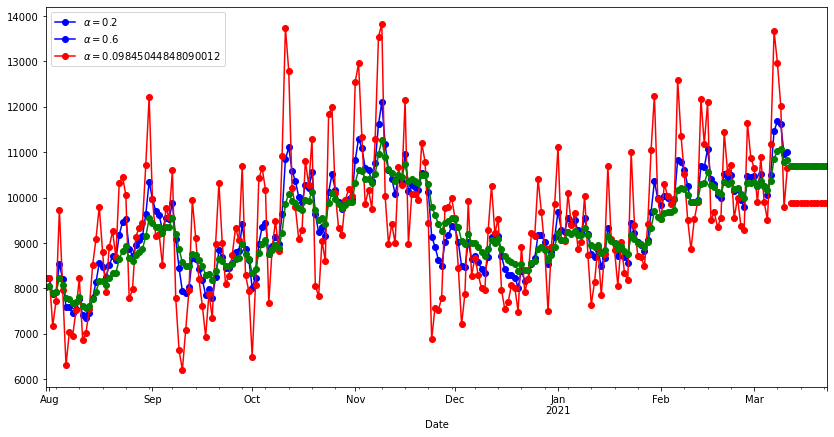

2021-03-12    10690.99289
2021-03-13    10690.99289
2021-03-14    10690.99289
2021-03-15    10690.99289
2021-03-16    10690.99289
2021-03-17    10690.99289
2021-03-18    10690.99289
2021-03-19    10690.99289
2021-03-20    10690.99289
2021-03-21    10690.99289
2021-03-22    10690.99289
2021-03-23    10690.99289
Freq: D, Name: $\alpha=0.09845044848090012$, dtype: float64

In [115]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(daily_sales.Sales_Total).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

plt.figure(figsize=(14, 7))
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

fit2 = SimpleExpSmoothing(daily_sales.Sales_Total).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')

# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')

fit3 = SimpleExpSmoothing(daily_sales.Sales_Total).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()
fcast3

### Holt’s Model <a id="94"></a>  [^](#T)<br>

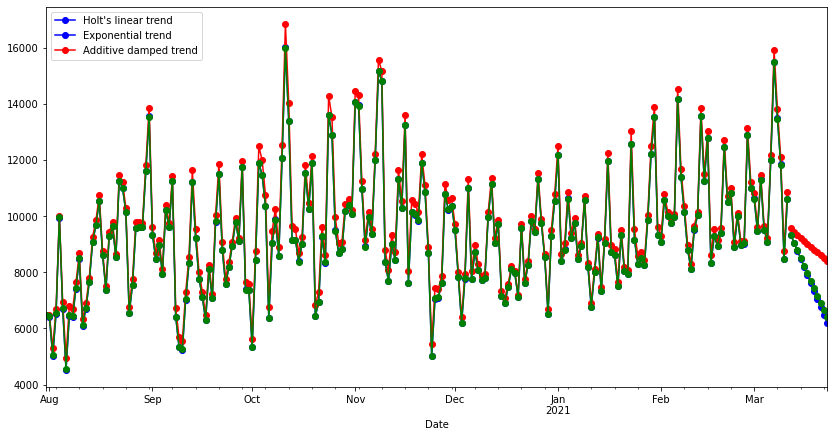

2021-03-12    9332.363581
2021-03-13    9046.257032
2021-03-14    8760.150484
2021-03-15    8474.043935
2021-03-16    8187.937387
2021-03-17    7901.830838
2021-03-18    7615.724290
2021-03-19    7329.617741
2021-03-20    7043.511193
2021-03-21    6757.404644
2021-03-22    6471.298096
2021-03-23    6185.191548
Freq: D, Name: Holt's linear trend, dtype: float64
2021-03-12    9557.731659
2021-03-13    9446.681937
2021-03-14    9336.922482
2021-03-15    9228.438305
2021-03-16    9121.214588
2021-03-17    9015.236686
2021-03-18    8910.490123
2021-03-19    8806.960594
2021-03-20    8704.633958
2021-03-21    8603.496237
2021-03-22    8503.533620
2021-03-23    8404.732452
Freq: D, Name: Exponential trend, dtype: float64
2021-03-12    9334.502983
2021-03-13    9053.697586
2021-03-14    8775.700244
2021-03-15    8500.482875
2021-03-16    8228.017679
2021-03-17    7958.277136
2021-03-18    7691.233998
2021-03-19    7426.861291
2021-03-20    7165.132311
2021-03-21    6906.020621
2021-03-22    66

In [116]:
fit1 = Holt(daily_sales.Sales_Total).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(daily_sales.Sales_Total, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(daily_sales.Sales_Total, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")

plt.figure(figsize=(14, 7))

fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()
print(fcast1)
print(fcast2)
print(fcast3)

### Holt-Winters’ Seasonal Model  <a id="95"></a>  [^](#T)<br>

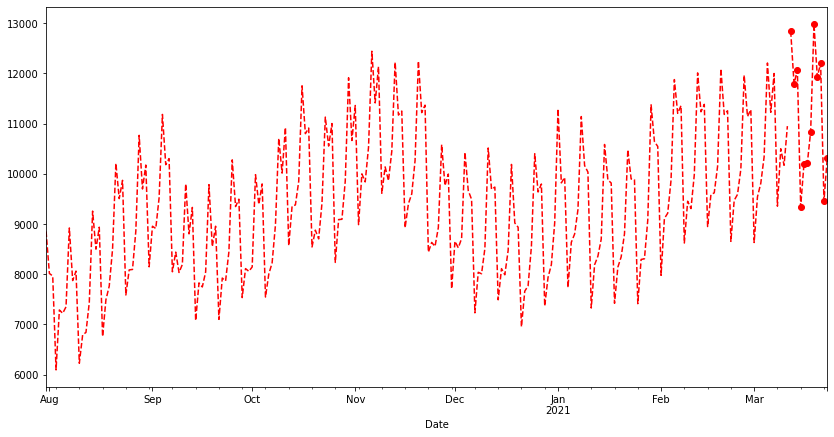

2021-03-12    12839.896490
2021-03-13    11798.119645
2021-03-14    12061.203569
2021-03-15     9348.468762
2021-03-16    10204.673834
2021-03-17    10210.667806
2021-03-18    10840.626051
2021-03-19    12986.048336
2021-03-20    11933.999185
2021-03-21    12199.688674
2021-03-22     9459.669062
2021-03-23    10324.591604
Freq: D, dtype: float64


In [134]:
fit1 = ExponentialSmoothing(daily_sales.Sales_Total, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
#fit2 = ExponentialSmoothing(daily_sales.Sales_Total, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
#fit3 = ExponentialSmoothing(daily_sales.Sales_Total, seasonal_periods=7, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
#fit4 = ExponentialSmoothing(daily_sales.Sales_Total, seasonal_periods=7, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)

plt.figure(figsize=(14, 7))

fit1.fittedvalues.plot(style='--', color='red')
#fit2.fittedvalues.plot(style='--', color='green')

fit1.forecast(12).plot(style='--', marker='o', color='red')
#fit2.forecast(12).plot(style='--', marker='o', color='green')
#fit3.forecast(12).plot(style='--', marker='o', color='blue')
#fit4.forecast(12).plot(style='--', marker='o', color='purple')

plt.show()
print(fit1.forecast(12))
#print(fit2.forecast(12))
#print(fit3.forecast(12))
#print(fit4.forecast(12))